To support a team of researchers who have been collecting data about penguins in Antartica. The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  The task is to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [2]:
penguins_df.shape

(332, 5)

In [3]:
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [4]:
penguins_df.duplicated().sum()

0

In [5]:
penguins_df['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [6]:
penguins_df['sex'] = penguins_df['sex'].replace({'MALE':1, 'FEMALE':0})

In [7]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 13.1 KB


In [8]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904,0.503012
std,5.452462,1.960275,14.035971,806.361278,0.500746
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.500000,15.600000,190.000000,3550.000000,0.000000
50%,44.700000,17.300000,197.000000,4025.000000,1.000000
75%,48.625000,18.700000,213.000000,4781.250000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,1.000000


In [9]:
#checking multicollinearity
penguins_df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
culmen_length_mm,1.000000,-0.220570,0.654967,0.593396,0.351299
culmen_depth_mm,-0.220570,1.000000,-0.580062,-0.476386,0.369478
flipper_length_mm,0.654967,-0.580062,1.000000,0.873267,0.256198
body_mass_g,0.593396,-0.476386,0.873267,1.000000,0.424936
sex,0.351299,0.369478,0.256198,0.424936,1.000000


In [10]:
#to remove one feature 'flipper_length'
penguins_df_a = penguins_df.drop('flipper_length_mm', axis=1)

In [11]:
scaler = StandardScaler()

p_df = scaler.fit_transform(penguins_df_a)
p_df = pd.DataFrame(p_df, columns= penguins_df_a.columns)
p_df.head(3)

,culmen_length_mm,culmen_depth_mm,body_mass_g,sex
0,-0.903906,0.790360,-0.566948,0.993994
1,-0.830434,0.126187,-0.504847,-1.006042
2,-0.683490,0.432728,-1.187953,-1.006042


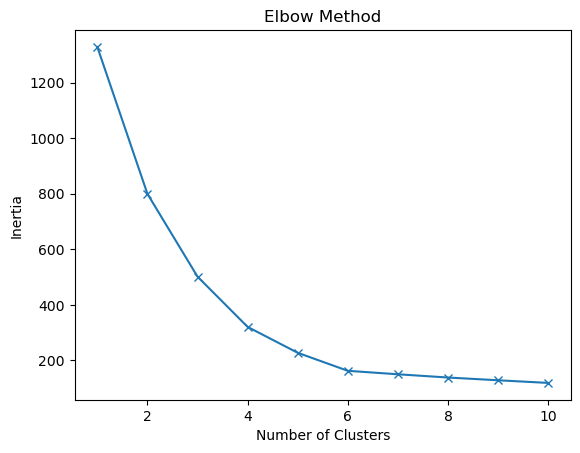

In [12]:
#to find the optimized number of clusters

el = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=3)
    km.fit(p_df)
    el.append(km.inertia_)
plt.plot(range(1, 11), el, marker = 'x')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [13]:
kms = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=3)
kms.fit(p_df)
labels = kms.predict(p_df)

In [14]:
penguins_df['type']=labels

In [15]:
penguins_df.head(3)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,type
0,39.1,18.7,181.0,3750.0,1,0
1,39.5,17.4,186.0,3800.0,0,3
2,40.3,18.0,195.0,3250.0,0,3


In [16]:
stat_penguins = penguins_df.groupby('type').mean()

In [17]:
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
type,,,,,
0,43.878302,19.111321,194.764151,4006.603774,1.0
1,45.774576,14.298305,212.169492,4663.135593,0.0
2,49.473770,15.718033,221.540984,5484.836066,1.0
3,40.050000,17.609434,189.122642,3416.509434,0.0
